In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import classify
reload(classify)
import mcc

In [3]:
import htwt

In [5]:
X, y = htwt.get()

In [22]:
import nb
import lda
from sklearn.lda import LDA
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression

In [26]:
clf = BernoulliNB()
clf = nb.bernoulli()
clf = GaussianNB()
clf = nb.gaussian()
clf = LDA()
clf = lda.Classifier()
clf = LogisticRegression()

In [24]:
clf.fit(X, y)
print '%0.3f' % np.mean(np.mean(clf.predict(X) != y))

0.195


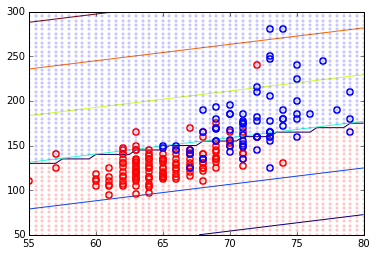

In [25]:
classify.show_points(X, y)
classify.show_regions(clf, X)
plt.show()